# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Estefania Zapata Valderrama
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

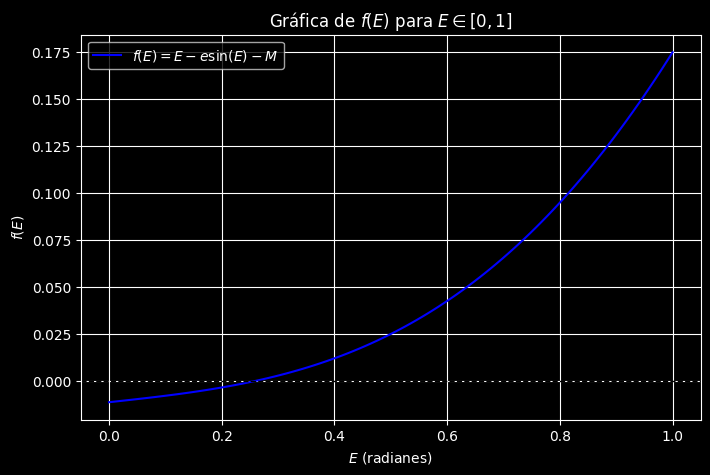

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

e = 0.9672671
T = 75.96
t0 = 1986.1113

M = lambda t: (2 * np.pi / T) * (t - t0)

#1 de abril de 1986
t_april = 1986 + (31+28+31+1) / 365  # la fecha debe estar en años
M_april = M(t_april)

# La Ecuacion de Kepler queda:
f = lambda E, M_val: E - e * np.sin(E) - M_val

E_vals = np.linspace(0, 1, 100)
f_vals = [f(E, M_april) for E in E_vals]

plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(E_vals, f_vals, label=r'$f(E) = E - e\sin(E) - M$', color='blue')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel(r'$E$ (radianes)')
plt.ylabel(r'$f(E)$')
plt.title('Gráfica de $f(E)$ para $E \in [0,1]$')
plt.legend()
plt.grid()
plt.show()

Valor de E (Newton): 0.261250
Valor de E (Secante): 0.261250


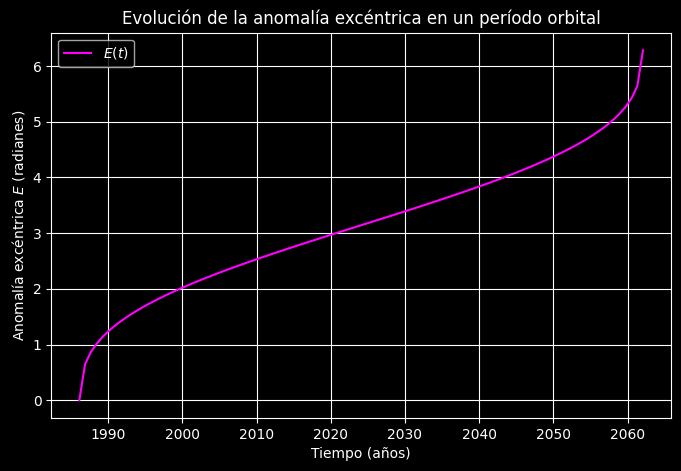

In [49]:
# E con Newton y Secante
E_newton = newton(f, 0.5, args=(M_april,))
E_secante = root_scalar(f, args=(M_april,), x0=0.5, x1=1.0, method='secant').root

print(f'Valor de E (Newton): {E_newton:.6f}')
print(f'Valor de E (Secante): {E_secante:.6f}')

t_values = np.linspace(t0, t0 + T, 100)
M_values = M(t_values)
E_values = [newton(f, 0.5, args=(M_val,)) for M_val in M_values]

plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(t_values, E_values, label='$E(t)$', color='magenta')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica $E$ (radianes)')
plt.title('Evolución de la anomalía excéntrica en un período orbital')
plt.legend()
plt.grid()
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar, fixed_point, fsolve

def f(m, T):
    return m - np.tanh(m / T)

def df(m, T):
    return 1 - (1 / T) * (1 / np.cosh(m / T))**2

T_fixed = 0.5
m_newton = newton(f, x0=1.0, fprime=df, args=(T_fixed,)) #usando Newton
sol_secante = newton(f, x0=1.0, x1=0.5, args=(T_fixed,)) #usando secante
m_fsolve = fsolve(f, x0=1.0, args=(T_fixed)) #usando punto fijo

print(f"Método de Newton-Raphson: m ≈ {m_newton:.4f}")
print(f"Método de la Secante: m ≈ {sol_secante:.4f}")
print(f"Solución usando fsolve: m ≈ {m_fsolve[0]:.4f}")


Método de Newton-Raphson: m ≈ 0.9575
Método de la Secante: m ≈ 0.9575
Solución usando fsolve: m ≈ 0.9575


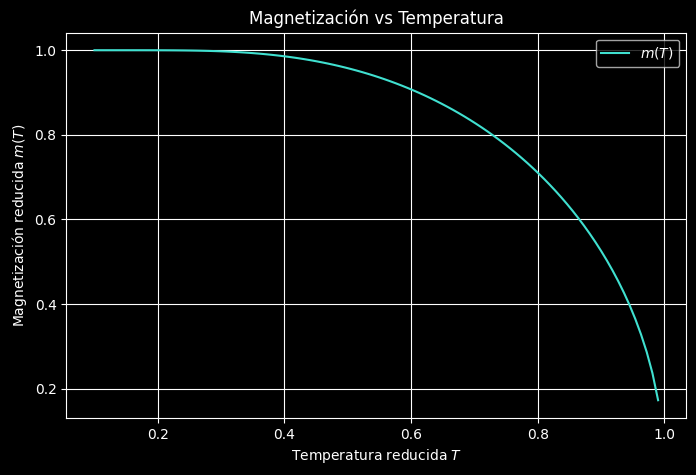

In [55]:
# Curva m(T) usando el método de la Secante
T_vals = np.linspace(0.1, 0.99, 100)
m_vals = []

for T in T_vals:
    sol = newton(f, x0=1.0, x1=0.5, args=(T,))
    m_vals.append(sol)

# Grafica m(T)
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(T_vals, m_vals, label=r'$m(T)$', color='turquoise')
plt.xlabel('Temperatura reducida $T$')
plt.ylabel('Magnetización reducida $m(T)$')
plt.title('Magnetización vs Temperatura')
plt.legend()
plt.grid()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [56]:
R = 8.314  # J/K
T0 = 4.444  # K
G_objetivo = -1e5  # J

def f(T):
    return -R * T * (5/2) * np.log(T / T0) - G_objetivo

T_sol = newton(f, x0=500, x1=1500)
print(f"Temperatura que da G = -10^5 J: {T_sol:.2f} K")


Temperatura que da G = -10^5 J: 904.97 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

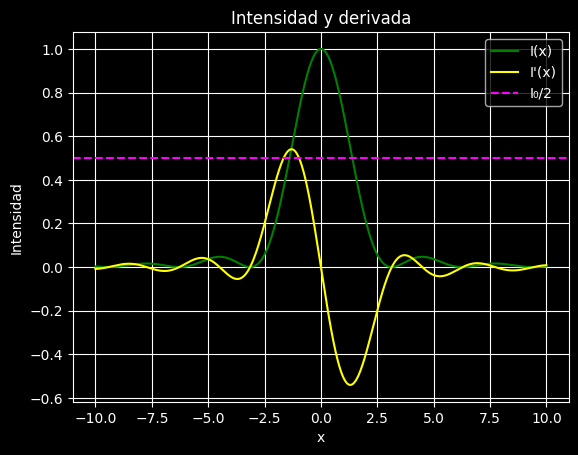

In [42]:
I0 = 1
def I(x):
    return I0 * (np.sinc(x / np.pi))**2

def dI(x):
    return (2 * I0 / x) * (np.cos(x) - np.sinc(x / np.pi)) * np.sinc(x / np.pi)

x_vals = np.linspace(-10, 10, 1000)

plt.style.use('dark_background')
plt.plot(x_vals, I(x_vals), label='I(x)', color='green')
plt.plot(x_vals, dI(x_vals), label="I'(x)", color='yellow')
plt.axhline(0.5, color='magenta', linestyle='--', label='I₀/2')
plt.legend()
plt.grid()
plt.title('Intensidad y derivada')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.show()



In [47]:
sol = newton(dI, x0=np.pi, x1=np.pi + 0.1)
print(sol)


3.1415926535897927


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

In [27]:
h = 6.626e-34
c = 2.998e8
k_B = 1.381e-23

def planck(λ, T):
    a = 8 * np.pi * h * c
    b = λ**5 * (np.exp(h * c / (λ * k_B * T)) - 1)
    return a / b

def derivada_planck(λ, T):
    λ0 = h * c / (k_B * T)
    x = λ / λ0
    K = 8 * np.pi * k_B * T / λ0**4
    num = 5*x + (1 - 5*x)*np.exp(1/x)
    den = x**7 * (np.exp(1/x) - 1)**2
    return K * λ0 * num / den


lambdas = np.linspace(1e-7, 3e-6, 500)
temperaturas = [4000, 5000, 6000]


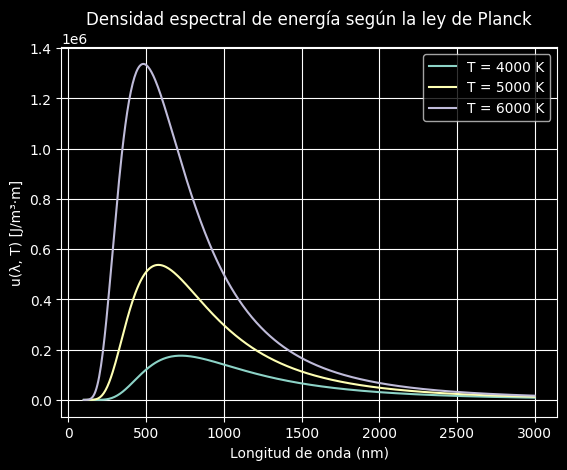

In [31]:
# Graficar u(λ, T)
for T in temperaturas:
    u = planck(lambdas, T)
    plt.plot(lambdas * 1e9, u, label=f"T = {T} K")

plt.xlabel("Longitud de onda (nm)")
plt.ylabel("u(λ, T) [J/m³·m]")
plt.title("Densidad espectral de energía según la ley de Planck")
plt.legend()
plt.grid(True)
plt.show()

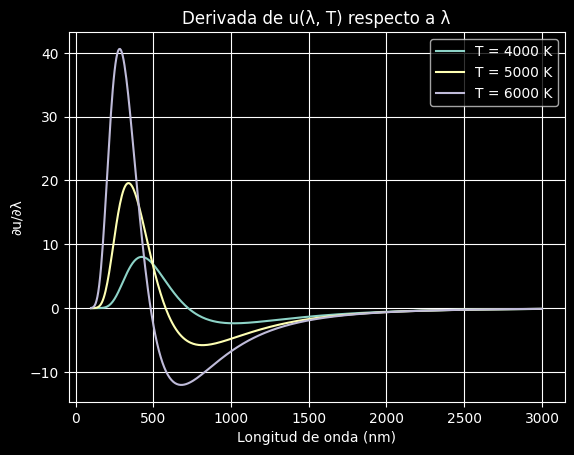

In [32]:

# Graficar derivada
for T in temperaturas:
    du_dλ = derivada_planck(lambdas, T)
    plt.plot(lambdas * 1e9, du_dλ, label=f"T = {T} K")
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("∂u/∂λ")
plt.title("Derivada de u(λ, T) respecto a λ")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
def f(x):
    return 5*x + (1 - 5*x)*np.exp(1/x)

def df(x):
    exp_term = np.exp(1/x)
    return 5 - 5*exp_term - (1 - 5*x)*exp_term * (-1/x**2)

T = 5778
λ0 = h * c / (k_B * T)

x_biseccion = bisect(f, 0.1, 10)
x_newton = newton(f, x0=5, fprime=df)

# Calcular lambda_max
λ_max_biseccion = x_biseccion * λ0
λ_max_newton = x_newton * λ0

# ley de Wien
producto_biseccion = λ_max_biseccion * T
producto_newton = λ_max_newton * T
wien = 2.898e-3

print(f"[Bisección] λ_max = {λ_max_biseccion:.3e} m  → λ_max·T = {producto_biseccion:.3e} m·K")
print(f"[Newton]   λ_max = {λ_max_newton:.3e} m  → λ_max·T = {producto_newton:.3e} m·K")
print(f"Referencia de Wien: λ_max·T ≈ {wien:.3e} m·K")



[Bisección] λ_max = 3.784e+26 m  → λ_max·T = 2.186e+30 m·K
[Newton]   λ_max = 3.784e+26 m  → λ_max·T = 2.186e+30 m·K
Referencia de Wien: λ_max·T ≈ 2.898e-03 m·K


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

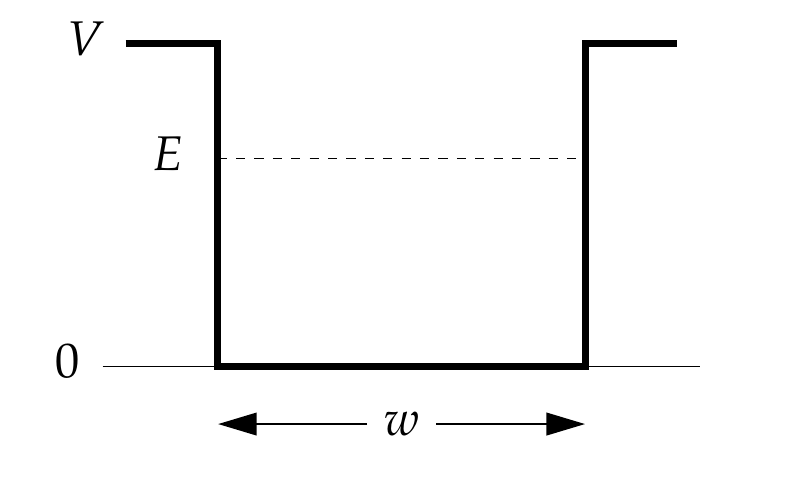

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

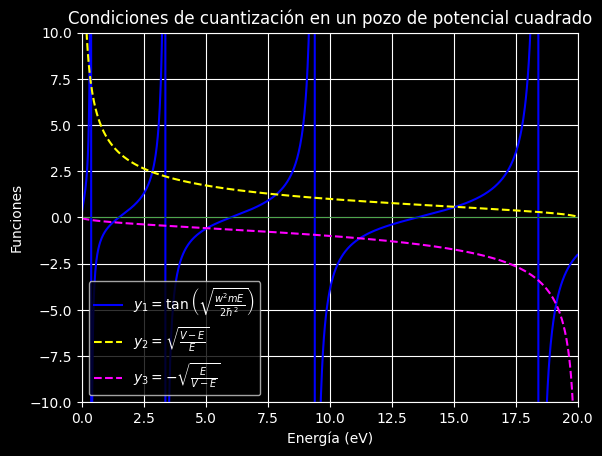

In [26]:
hbar = 1.0545718e-34
eV = 1.60218e-19
m = 9.11e-31
w = 1e-9
V0 = 20 * eV

E = np.linspace(0.01* eV, V0 - 0.01*eV , 1000)

arg = np.sqrt(w**2 * m * E / (2 * hbar**2))
y1 = np.tan(arg)
y2 = np.sqrt((V0 - E) / E)
y3 = -np.sqrt(E / (V0 - E))

plt.style.use('dark_background')
plt.plot(E/eV, y1, label=r'$y_1 = \tan\left(\sqrt{\frac{w^2 m E}{2 \hbar^2}} \right)$', color='blue')
plt.plot(E/eV, y2, label=r'$y_2 = \sqrt{\frac{V - E}{E}}$', linestyle='--', color= 'yellow')
plt.plot(E/eV, y3, label=r'$y_3 = -\sqrt{\frac{E}{V - E}}$', linestyle='--',color='magenta')

plt.axhline(0, color='green', linewidth=0.5)
plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.xlabel('Energía (eV)')
plt.ylabel('Funciones')
plt.title('Condiciones de cuantización en un pozo de potencial cuadrado')
plt.legend()
plt.grid(True)
plt.show()


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [44]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

def f(r):
    r1 = G * M / r**2
    r2 = G * m / (R - r)**2
    r3 = w**2 * r
    return r1 - r2 - r3

sol2 = newton(f, x0=R * 0.9, x1=R * 0.8)
print(f"Distancia desde la Tierra hasta el punto L1: {sol2:.2f} m")


Distancia desde la Tierra hasta el punto L1: 326045071.67 m
